In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk #natural language toolkit
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df=pd.read_csv("train_csv.csv",sep=",")
df.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam


In [5]:
df.sample(5)

,text,label
7029,"Hello, for my thesis i am working with tobins ...",not_spam
6146,"Hey, have you heard of BizzGood? It's the hott...",spam
2982,Hey there! \n\nAre you tired of being bored on...,spam
4659,"Hi all, for college I am tasked to do a projec...",not_spam
4201,HEY!! Do you want to make some M0NEY$$$ fast?🤑...,spam


In [6]:
df.shape

(8175, 2)

In [7]:
#data cleaning
#Exploratory Data Analysis
#text preprocessing
#model building


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8175 entries, 0 to 8174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8175 non-null   object
 1   label   8175 non-null   object
dtypes: object(2)
memory usage: 127.9+ KB


In [9]:
#drop last 3 columns

#df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) 
# delete rows or columns directly from the original dataframe


In [10]:
df.sample(4)

,text,label
6701,"""Urgent! Don't miss out on this once-in-a-life...",spam
4362,Hello guys \n\nI am working on a chatbot suppo...,not_spam
6584,Ready to double your followers in 24 hours? Ch...,spam
1839,Are you tired of not getting enough likes on y...,spam


In [11]:
#renaming the columns
#df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,text,label
6238,This doesn't have to be an excel data set. I'm...,not_spam
5495,GET RICH QUICK WITH OUR AMAZING NEW SYSTEM - J...,spam
1119,"ANNOUNCEMENT!!! 😱😱😱\n\n💥 Hiii guys, it's your ...",spam
1603,Take a look at this aMAziNG OfFeR!!!\n\n,spam
5952,looking for data on sales figures on Halloween...,not_spam
4665,"I'm not sure if this is the subreddit to ask, ...",not_spam
4805,The data science job is one of the most popula...,not_spam
2514,I want to test the hypothesis that the quantit...,not_spam
8028,Hey there! You won't believe what's hot right ...,spam
2501,I'm looking at data integration and warehousin...,not_spam


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [13]:
encoder.fit_transform(df['label'])  #code ham (0) or spam (1)

array([0, 1, 1, ..., 0, 1, 1])

In [14]:
df['label']=encoder.fit_transform(df['label'])

In [15]:
df.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,0
1,"""Get rich quick! Make millions in just days wi...",1
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1
3,[Google AI Blog: Contributing Data to Deepfake...,0
4,Trying to see if anyone already has timestamps...,0


In [16]:
df.isnull().sum()  #missing values

text     0
label    0
dtype: int64

In [17]:
#check duplicates

df.duplicated().sum()

133

In [18]:
df= df.drop_duplicates()

In [19]:

df.duplicated().sum()

0

In [20]:
df.shape

(8042, 2)

In [21]:
#EDA
#data division - %of ham and spam 0/1

df['label'].value_counts()
 

label
1    4125
0    3917
Name: count, dtype: int64

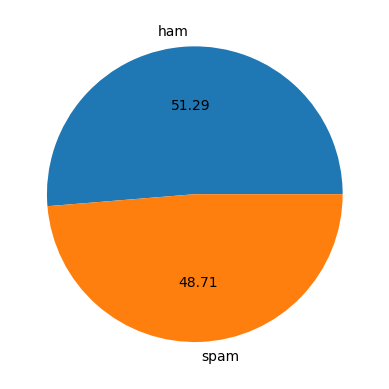

In [22]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
#data is slightly imbalanced



In [24]:
df['num_of_characters']=df['text'].apply(len)


In [25]:
df.head()

,text,label,num_of_characters
0,hey I am looking for Xray baggage datasets can...,0,76
1,"""Get rich quick! Make millions in just days wi...",1,129
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1,495
3,[Google AI Blog: Contributing Data to Deepfake...,0,1057
4,Trying to see if anyone already has timestamps...,0,223


In [26]:
#fetch no of words

df['text'].apply(lambda x:nltk.word_tokenize(x))   #breaking sms on the basis of words



0       [hey, I, am, looking, for, Xray, baggage, data...
1       [``, Get, rich, quick, !, Make, millions, in, ...
2       [URGENT, MESSAGE, :, YOU, WO, N'T, BELIEVE, WH...
3       [[, Google, AI, Blog, :, Contributing, Data, t...
4       [Trying, to, see, if, anyone, already, has, ti...
                              ...                        
8170    [Hi, all, ,, We, create, datasets, by, taking,...
8171    [DEALS, !, DEALS, !, DEALS, !, Hey, peeps, !, ...
8172    [Hi, I, am, working, on, a, project, and, need...
8173    [Do, you, want, to, BLOW, UP, your, social, me...
8174    [WAZZUP, MY, FELLOW, NETIZENS, !, Time, to, ge...
Name: text, Length: 8042, dtype: object

In [27]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0        15
1        27
2       122
3       160
4        47
       ... 
8170    163
8171    117
8172     39
8173     70
8174    115
Name: text, Length: 8042, dtype: int64

In [28]:
df['num_of_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,text,label,num_of_characters,num_of_words
0,hey I am looking for Xray baggage datasets can...,0,76,15
1,"""Get rich quick! Make millions in just days wi...",1,129,27
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1,495,122
3,[Google AI Blog: Contributing Data to Deepfake...,0,1057,160
4,Trying to see if anyone already has timestamps...,0,223,47


In [30]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))  #tokenizing on basis of sentence

0       [hey I am looking for Xray baggage datasets ca...
1       ["Get rich quick!, Make millions in just days ...
2       [URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAV...
3       [[Google AI Blog: Contributing Data to Deepfak...
4       [Trying to see if anyone already has timestamp...
                              ...                        
8170    [Hi all,\n\nWe create datasets by taking pictu...
8171    [DEALS!, DEALS!, DEALS!, Hey peeps!, You won't...
8172    [Hi\n\nI am working on a project and need pena...
8173    [Do you want to BLOW UP your social media foll...
8174    [WAZZUP MY FELLOW NETIZENS!, Time to get your ...
Name: text, Length: 8042, dtype: object

In [31]:
df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()


,text,label,num_of_characters,num_of_words,num_of_sentences
0,hey I am looking for Xray baggage datasets can...,0,76,15,1
1,"""Get rich quick! Make millions in just days wi...",1,129,27,3
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1,495,122,11
3,[Google AI Blog: Contributing Data to Deepfake...,0,1057,160,3
4,Trying to see if anyone already has timestamps...,0,223,47,3


In [33]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()


,num_of_characters,num_of_words,num_of_sentences
count,8042.000000,8042.000000,8042.000000
mean,368.800920,74.889828,4.767222
std,569.116374,111.274241,3.182979
min,2.000000,1.000000,1.000000
25%,175.000000,36.000000,3.000000
50%,284.000000,57.000000,4.000000
75%,507.000000,106.000000,6.000000
max,41544.000000,8322.000000,47.000000


In [34]:
df.describe().T.style.background_gradient(cmap="Purples_r")

,count,mean,std,min,25%,50%,75%,max
label,8042.000000,0.512932,0.499864,0.000000,0.000000,1.000000,1.000000,1.000000
num_of_characters,8042.000000,368.800920,569.116374,2.000000,175.000000,284.000000,507.000000,41544.000000
num_of_words,8042.000000,74.889828,111.274241,1.000000,36.000000,57.000000,106.000000,8322.000000
num_of_sentences,8042.000000,4.767222,3.182979,1.000000,3.000000,4.000000,6.000000,47.000000


In [35]:
df[df['label'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe() #ham

,num_of_characters,num_of_words,num_of_sentences
count,3917.000000,3917.000000,3917.000000
mean,407.243043,78.591779,3.913965
std,791.745547,154.199205,3.201602
min,2.000000,1.000000,1.000000
25%,174.000000,34.000000,2.000000
50%,286.000000,56.000000,3.000000
75%,471.000000,91.000000,5.000000
max,41544.000000,8322.000000,47.000000


In [36]:
df[df['label'] == 1][['num_of_characters','num_of_words','num_of_sentences']].describe() #spam

,num_of_characters,num_of_words,num_of_sentences
count,4125.000000,4125.000000,4125.000000
mean,332.297212,71.374545,5.577455
std,183.162688,39.228688,2.944957
min,27.000000,6.000000,1.000000
25%,176.000000,37.000000,3.000000
50%,280.000000,59.000000,5.000000
75%,526.000000,116.000000,8.000000
max,726.000000,170.000000,19.000000


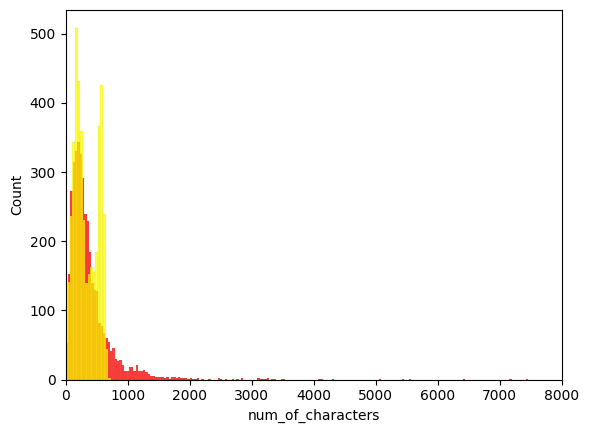

In [37]:
sns.histplot(df[df['label']==0]['num_of_characters'],color='red')  #not spam
sns.histplot(df[df['label']==1]['num_of_characters'],color='yellow')  #spam
plt.xlim(0, 8000)
plt.show()

#outliers do exist

<Figure size 2000x1200 with 0 Axes>

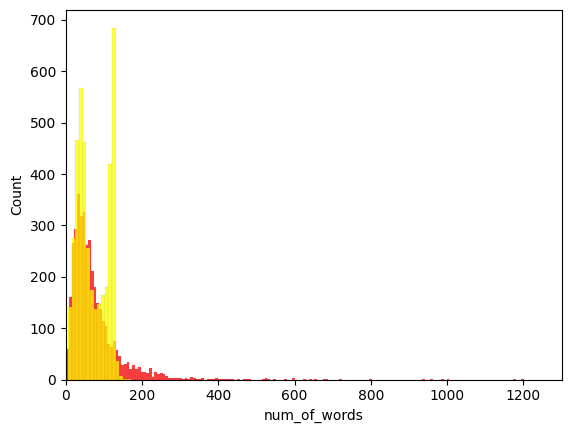

<Figure size 2000x1200 with 0 Axes>

In [38]:
sns.histplot(df[df['label']==0]['num_of_words'],color='red')
sns.histplot(df[df['label']==1]['num_of_words'],color='yellow')
plt.xlim(0,1300)
plt.figure(figsize=(20,12))  
 

#outliers do exist

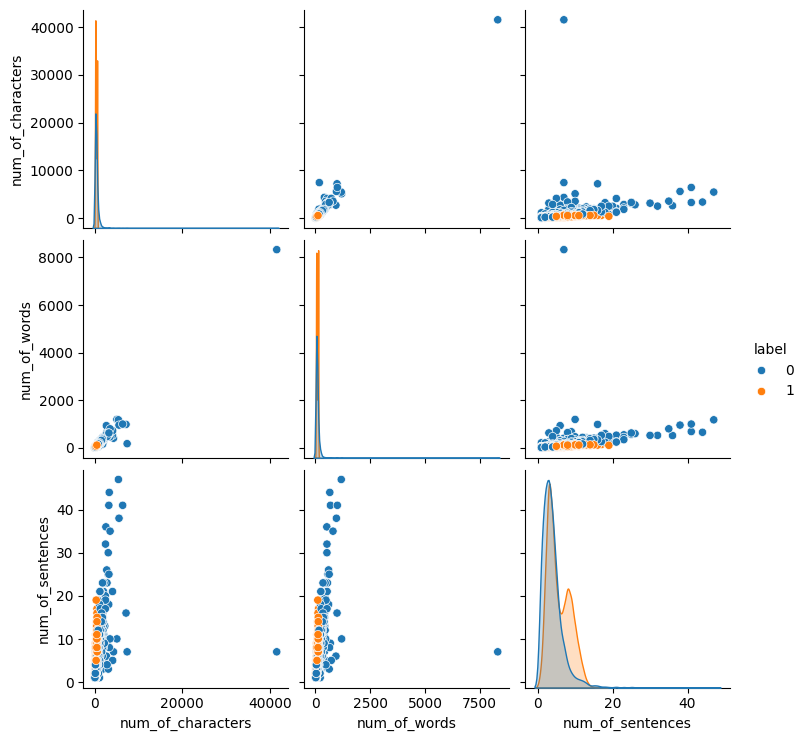

In [39]:
sns.pairplot(df,hue='label')   #outliers exist and may cause problem

In [40]:
numeric_df = df.drop(columns=['text'])
numeric_df


,label,num_of_characters,num_of_words,num_of_sentences
0,0,76,15,1
1,1,129,27,3
2,1,495,122,11
3,0,1057,160,3
4,0,223,47,3
...,...,...,...,...
8170,0,832,163,12
8171,1,509,117,11
8172,0,200,39,4
8173,1,355,70,5


In [41]:
corr_matrix = numeric_df.corr()

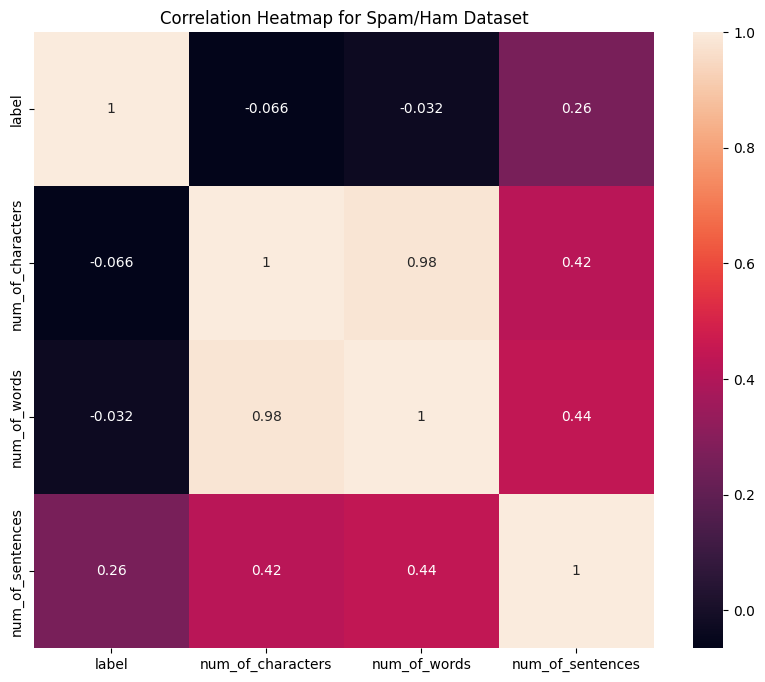

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap for Spam/Ham Dataset')
plt.show()

In [43]:
#Text Preprocessing

#-lower case
#-tokenization
#-removw special characters
#-removing stopwords and punctuation
#-stemming (group similar type of word- play,plays,played)

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [44]:
def data_preprocessing (txt):
    txt=txt.lower()
    txt=nltk.word_tokenize(txt)
   
    y=[]
    
    for i in txt:
        if i.isalnum():
            y.append(i)
    
    txt=y[:] #cloning
    y.clear()
    for i in txt:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    txt=y[:]
    y.clear()
    
    for i in txt:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
df["transformed_text"]=df["text"].apply(data_preprocessing)
df.head()

,text,label,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,hey I am looking for Xray baggage datasets can...,0,76,15,1,hey look xray baggag dataset provid
1,"""Get rich quick! Make millions in just days wi...",1,129,27,3,get rich quick make million day new revolution...
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,1,495,122,11,urgent messag wo believ offer hey yeah eye rea...
3,[Google AI Blog: Contributing Data to Deepfake...,0,1057,160,3,googl ai blog contribut data deepfak detect re...
4,Trying to see if anyone already has timestamps...,0,223,47,3,tri see anyon alreadi timestamp key event happ...


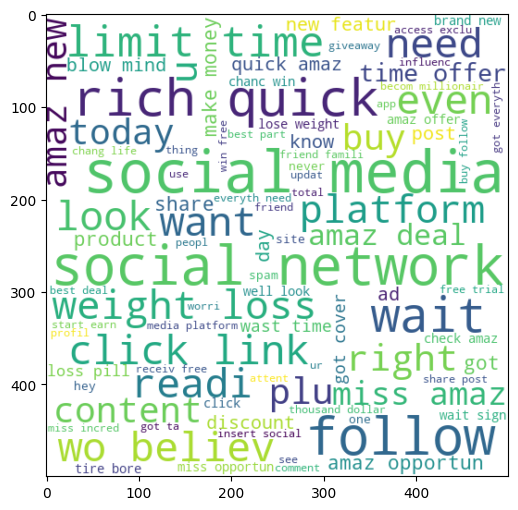

In [46]:
from PIL import Image,ImageDraw,ImageFont
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')      
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))   #wordcloud for spam messages
plt.figure(figsize=(15,6))
plt.imshow(spam_wc,interpolation="bilinear")

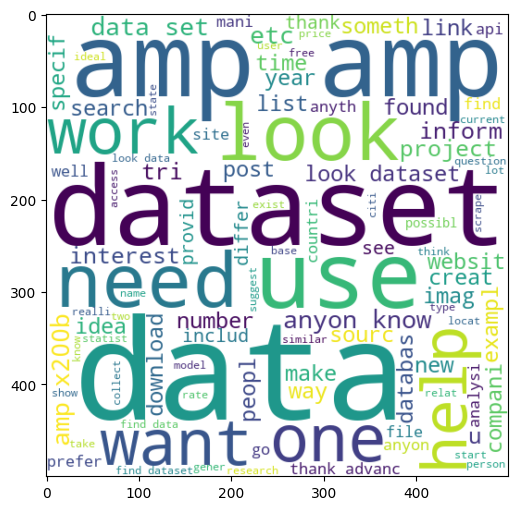

In [47]:
wc_ham = WordCloud(width=400,height=400,min_font_size=10,background_color='white')      
ham = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))   #wordcloud for spam messages
plt.figure(figsize=(15,6))
plt.imshow(ham,interpolation="bilinear")

In [48]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
              spam_corpus.append(word)
              
len(spam_corpus)

124645

In [49]:
from collections import Counter
Counter (spam_corpus).most_common(30)
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0          get
1         amaz
2          got
3       social
4         make
5         like
6          new
7       follow
8        offer
9         miss
10        time
11        deal
12        want
13        free
14        wait
15        look
16      exclus
17     network
18       click
19       media
20      latest
21        rich
22    opportun
23     product
24        tire
25      friend
26    platform
27       right
28       money
29        sign
Name: 0, dtype: object

In [50]:
ham_corpus=[]
for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
              ham_corpus.append(word)
              
len(ham_corpus)

130213

In [51]:
pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

0        data
1     dataset
2        http
3         amp
4        look
5       would
6        find
7         use
8        like
9        know
10      thank
11      anyon
12       help
13       need
14    project
15      could
16        get
17       work
18       want
19        set
20         hi
21       time
22        tri
23        one
24       year
25      x200b
26        etc
27    appreci
28       also
29     inform
Name: 0, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

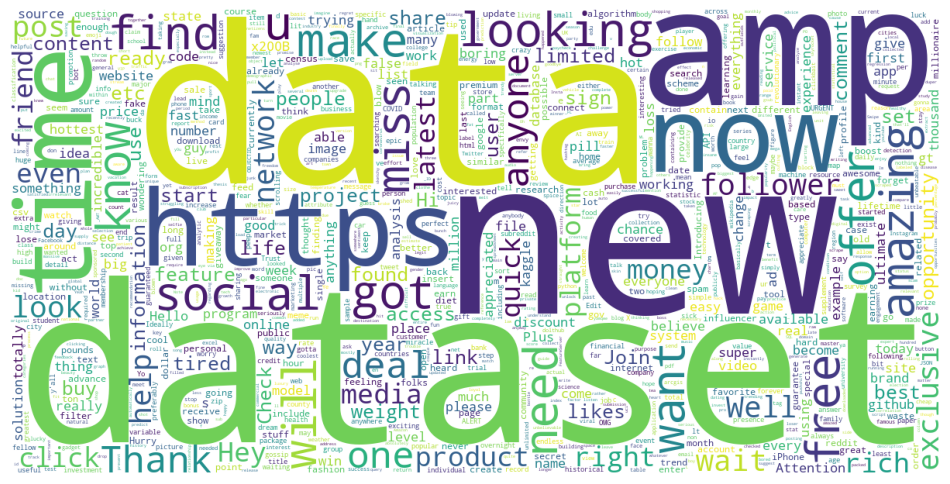

In [52]:
text = " ".join(i for i in df.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [12, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [53]:
#MODEL BUILDING
 #starting with naive based because text based

#naive based needs numeric info
#here input (transformed text is not in number) we convert it into vectors

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [54]:
#X=cv.fit_transform(df['transformed_text']).toarray() 
X= tfidf.fit_transform(df['transformed_text']).toarray()
X.shape



(8042, 12587)

In [55]:
Y=df['label'].values
Y

array([0, 1, 1, ..., 0, 1, 1])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes\n")
print("Accuracy Score=",accuracy_score(Y_test,Y_pred1),"\n")
print("Precision Score=",precision_score(Y_test,Y_pred1),"\n")
print("Confusion Matrix=\n",confusion_matrix(Y_test,Y_pred1))


Gaussian Naive Bayes

Accuracy Score= 0.9608452454940957 

Precision Score= 0.9579439252336449 

Confusion Matrix=
 [[726  36]
 [ 27 820]]


In [60]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes\n")
print("Accuracy Score=",accuracy_score(Y_test,Y_pred2),"\n")
print("Precision Score=",precision_score(Y_test,Y_pred2),"\n")
print("Confusion Matrix=\n",confusion_matrix(Y_test,Y_pred2))

Multinomial Naive Bayes

Accuracy Score= 0.9993784959602238 

Precision Score= 0.9988207547169812 

Confusion Matrix=
 [[761   1]
 [  0 847]]


In [61]:
bnb.fit(X_train,Y_train)
Y_pred3 = mnb.predict(X_test)
print("Binomial Naive Bayes\n")
print("Accuracy Score=",accuracy_score(Y_test,Y_pred3),"\n")
print("Precision Score=",precision_score(Y_test,Y_pred3),"\n")
print("Confusion Matrix=\n",confusion_matrix(Y_test,Y_pred3))

Binomial Naive Bayes

Accuracy Score= 0.9993784959602238 

Precision Score= 0.9988207547169812 

Confusion Matrix=
 [[761   1]
 [  0 847]]


In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

mnb=MultinomialNB()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
clf = svm.SVC()

In [63]:
"""refs={
    'KNC':knc,
    'NB': mnb,
    'SVM' :clf,
    'RFC':rfc}  """



"refs={\n    'KNC':knc,\n    'NB': mnb,\n    'SVM' :clf,\n    'RFC':rfc}  "

In [64]:
def train_classifier(ref,X_train,Y_train,X_test,Y_test):
    ref.fit(X_train,Y_train)
    Y_pred = ref.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [65]:
"""accuracy_scores = []
precision_scores = []

for name,ref in refs.items():
    
    current_accuracy,current_precision = train_classifier(ref, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("\nAccuracy - ",current_accuracy)
    print("Precision - ",current_precision,"\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision) """

'accuracy_scores = []\nprecision_scores = []\n\nfor name,ref in refs.items():\n    \n    current_accuracy,current_precision = train_classifier(ref, X_train,Y_train,X_test,Y_test)\n    \n    print("For ",name)\n    print("\nAccuracy - ",current_accuracy)\n    print("Precision - ",current_precision,"\n")\n    \n    accuracy_scores.append(current_accuracy)\n    precision_scores.append(current_precision) '

In [66]:
#performance_df = pd.DataFrame({'Algorithm':refs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [67]:
#performance_df

In [68]:
"""performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()"""

'performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")\nsns.catplot(x = \'Algorithm\', y=\'value\', \n               hue = \'variable\',data=performance_df1, kind=\'bar\',height=5)\nplt.ylim(0.5,1.0)\nplt.xticks(rotation=\'vertical\')\nplt.show()'

In [69]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred4 = rfc.predict(X_test)
print("Accuracy and Precision for Random Forest Classifier")
train_classifier(rfc,X_train,Y_train,X_test,Y_test)


Accuracy and Precision for Random Forest Classifier


(0.9981354878806712, 1.0)

In [70]:
cm= confusion_matrix(Y_test, Y_pred4)  
print(cm)

[[762   0]
 [  3 844]]


In [72]:
import pickle
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))